### Reading and playing sound files. 

This short tutorial explains an approach to reading and playing sound files using python. 

In order to make things work, please first go to the application Terminal (mac) or Anaconda Powershell Prompt (Windows).  This is not the terminal is VSCode.  

You should see the word (base) before the prompt. 

If so, you can just type 

pip install pydub 

and it should install the pydub library. 

If you don't see the word (base), come up and see me to fix it.  

**Most people use the ffmpeg libraries to code and decode mp3's, but Windows likes to use proprietary methods.**

As a consequence, mp3 files may not work for you, and you may have to use wav files.  Please come see me if you cant do either. 

In [13]:
import numpy as np 
from numpy import random 
import warnings #This is a new module you have not seen before 
from matplotlib import pyplot as plt
from sound import play_sound
import pydub

This function reads mp3 files, and returns the sound as a numpy array and the sampling rate.

In [20]:

def read_mp3(f, normalized=False):
    """Reads mp3 file f and returns the sound as a a numpy array. 
    Also returns sampling rate"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    samplingrate = a.frame_rate
    if normalized:
        return  np.float32(y) / 2**15, samplingrate
    else:
        return y, samplingrate

This function reads wav files, and returns the sound as a numpy array and the sampling rate.

In [21]:

def read_wav(f, normalized=False):
    """Reads wav file f and returns the sound as a a numpy array. 
    Also returns sampling rate."""
    a = pydub.AudioSegment.from_wav(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    samplingrate = a.frame_rate
    if normalized:
        return np.float32(y) / 2**15, samplingrate
    else:
        return y, samplingrate

Example reading and playing a wav file. 

In [22]:
f = 'track-4.wav'
y,sr = read_wav(f)
y = y.astype('int16')
play_sound(y,volume = 0.1,samplingrate=sr)

Example reading and playing a mp3 file. 

In [23]:
f = 'track-0.mp3'
x,sr = read_mp3(f)
x = x.astype('int16')
play_sound(x,volume = 0.1,samplingrate=sr)

Note that these are stereo files, so the numpy array has two columns, one for the left and one for the right,  I plot the wav file example 

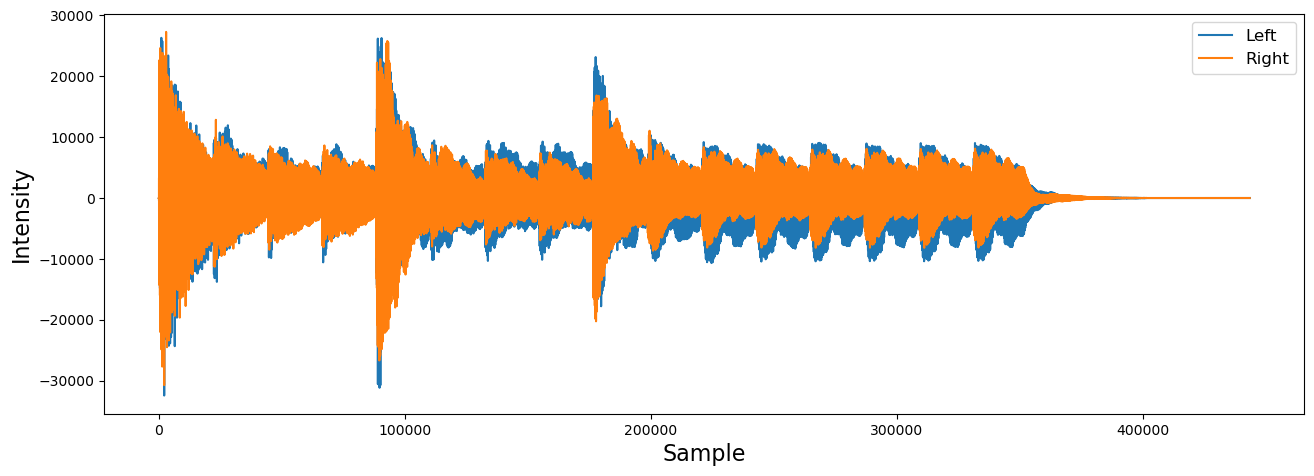

In [19]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize = (12,4))
ax = fig.add_axes([0,0,1,1])
ax.plot(y[:,0],label = 'Left')  #y was read in from the wav file.  
ax.plot(y[:,1], label='Right')
ax.set_xlabel('Sample', fontsize = 16)
ax.set_ylabel('Intensity', fontsize = 16)
plt.legend(fontsize = 12)
plt.show()
